<a href="https://colab.research.google.com/github/Sandra69-ms/python_case_study_class_Activity_upload_to_patshala/blob/main/Copy_of_case_study_unsupervisedlearning_sandra_ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder,RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import FunctionTransformer

In [2]:
data_adult = pd.read_csv('/content/adult_dataset.csv')
data_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [3]:
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [4]:
data_adult.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [5]:
data_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [6]:
data_adult.shape

(48842, 15)

In [7]:
data_adult.size

732630

In [8]:
data_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# EDA

In [9]:
num_cols = data_adult.select_dtypes(('float64','int64'))
cat_cols = data_adult.select_dtypes('object')

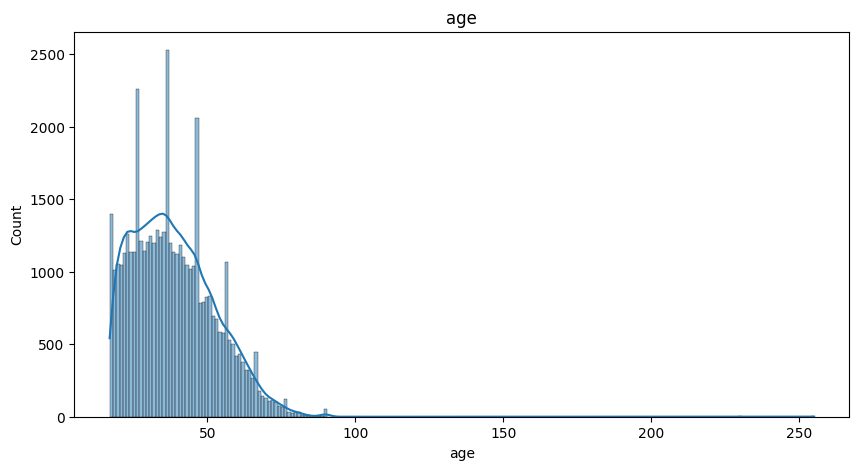

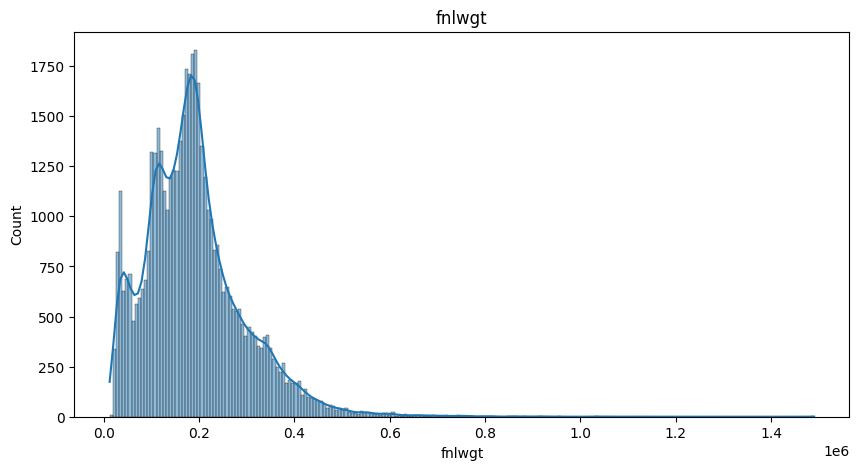

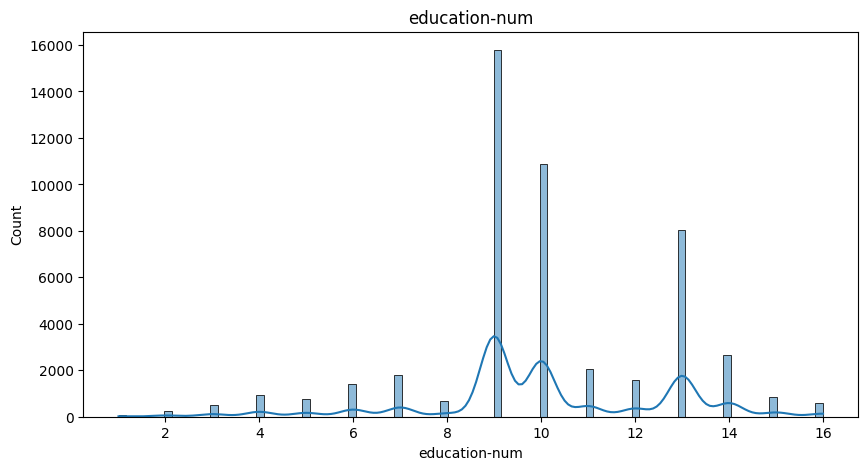

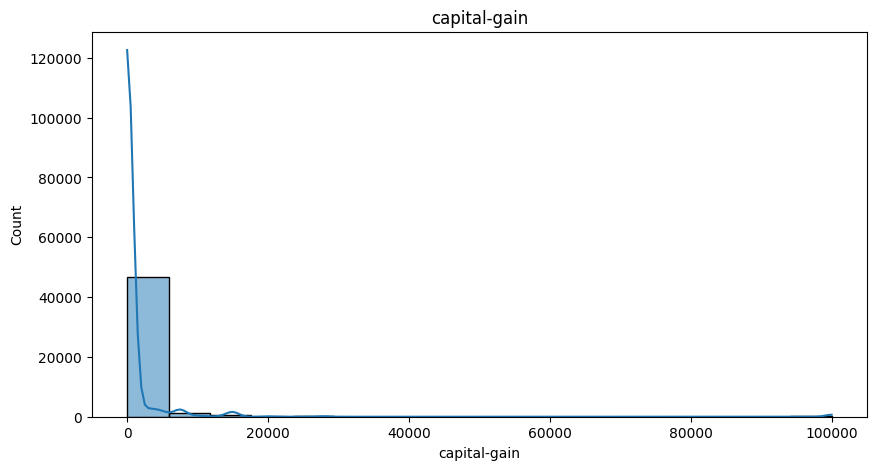

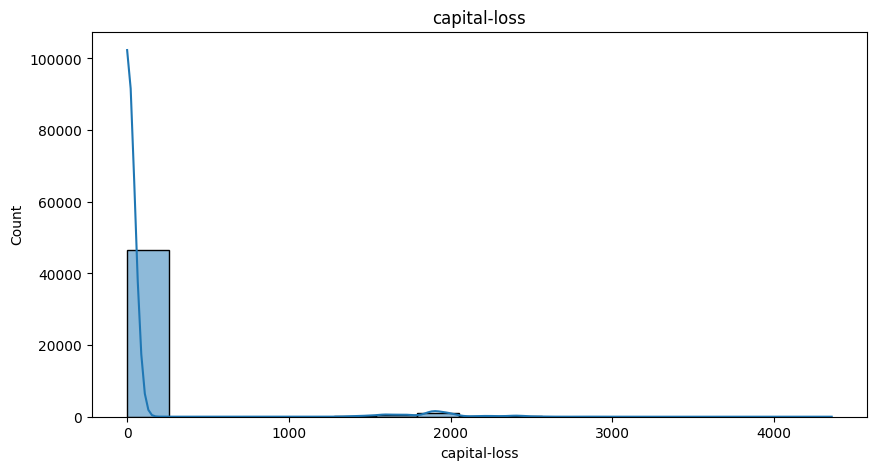

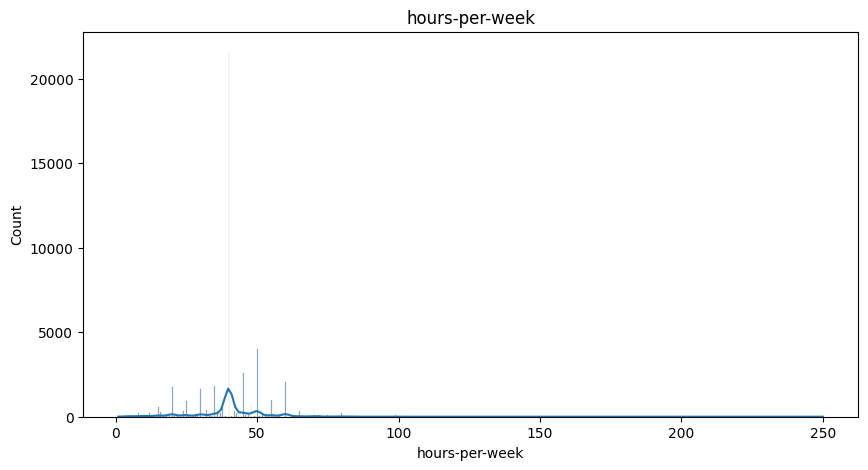

In [10]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data= data_adult,x=i,kde=True)
  plt.title(i)

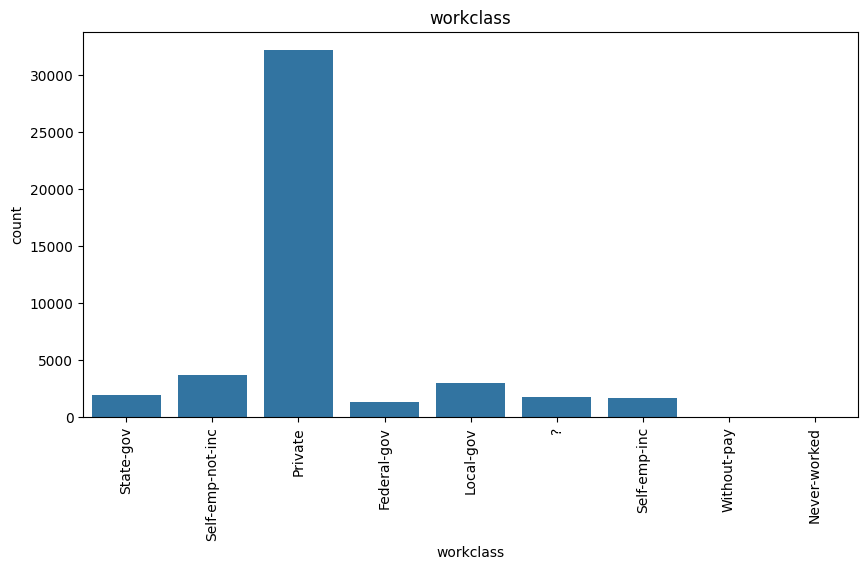

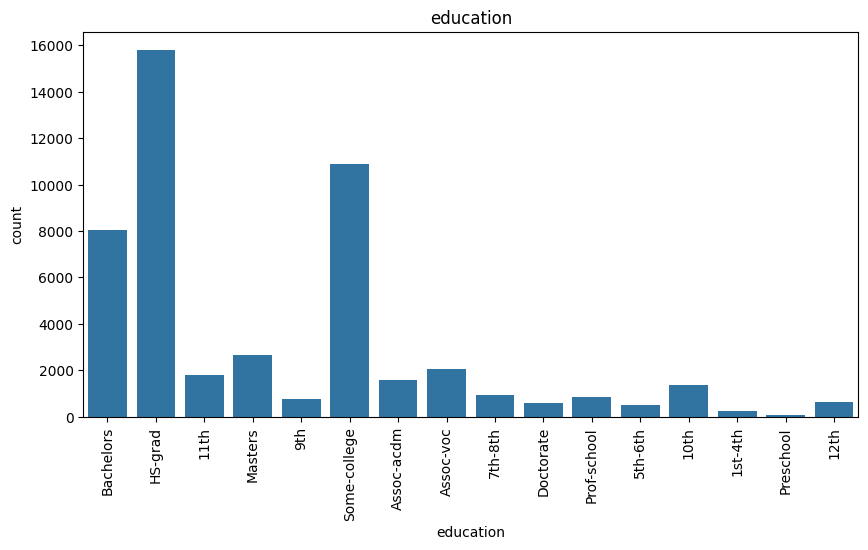

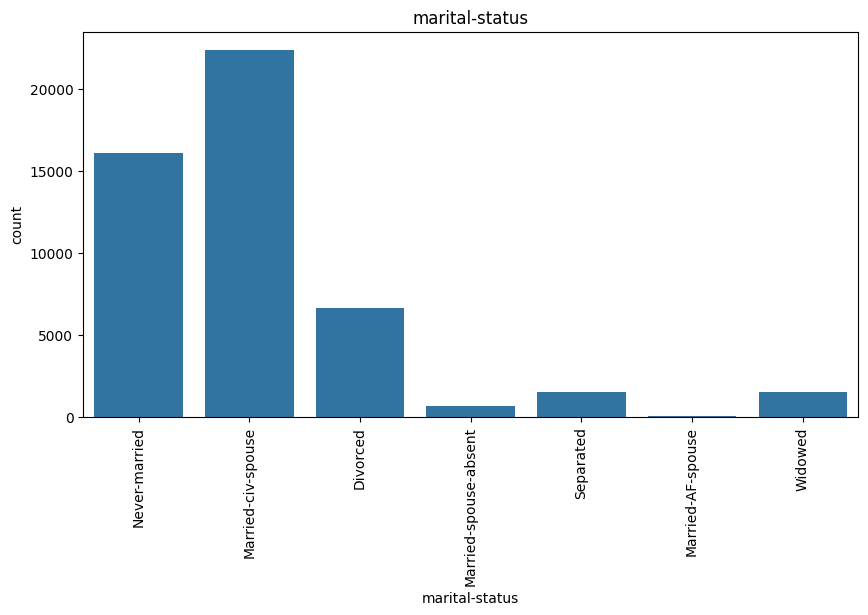

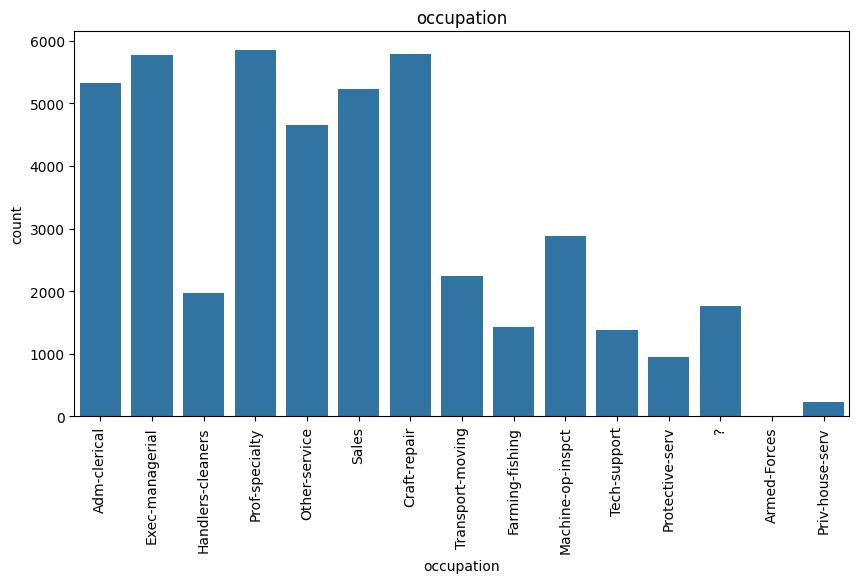

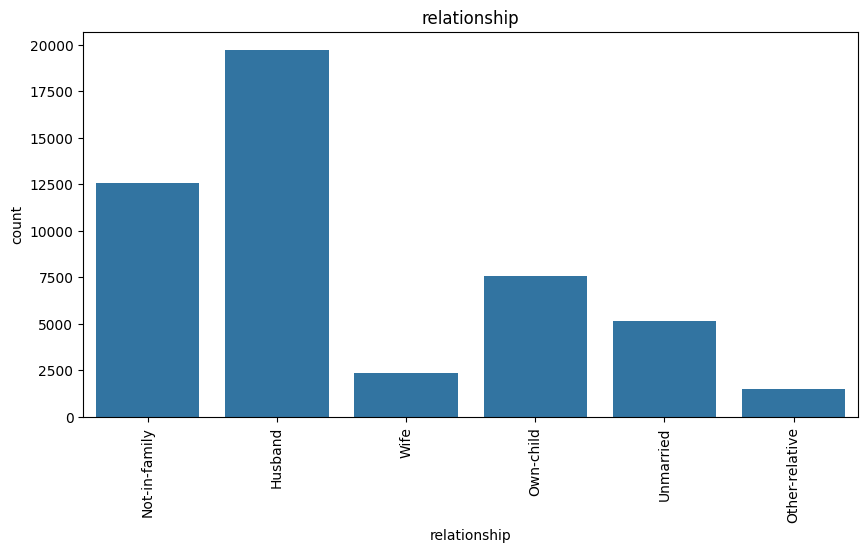

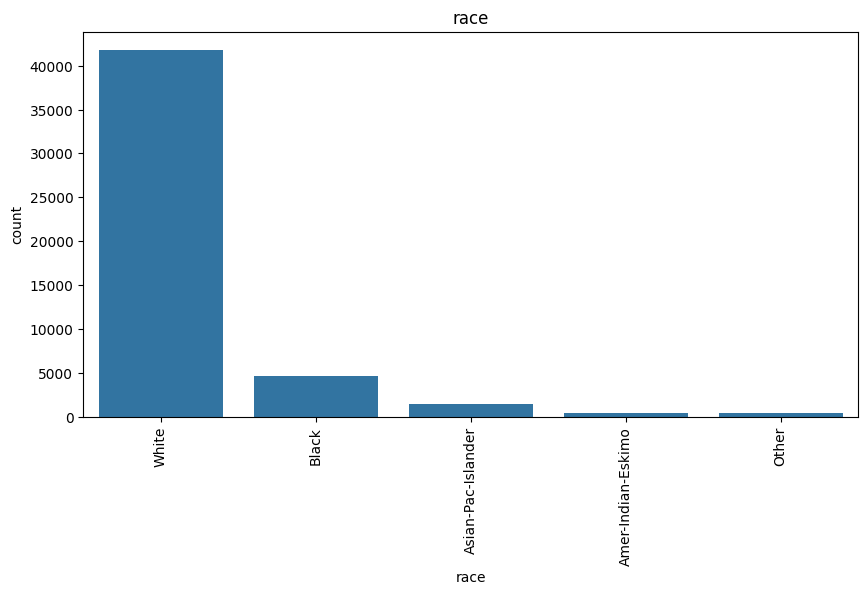

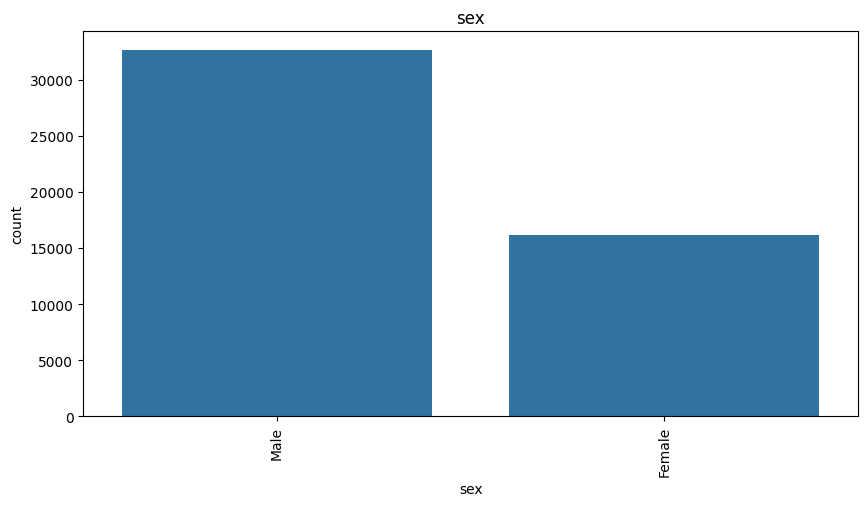

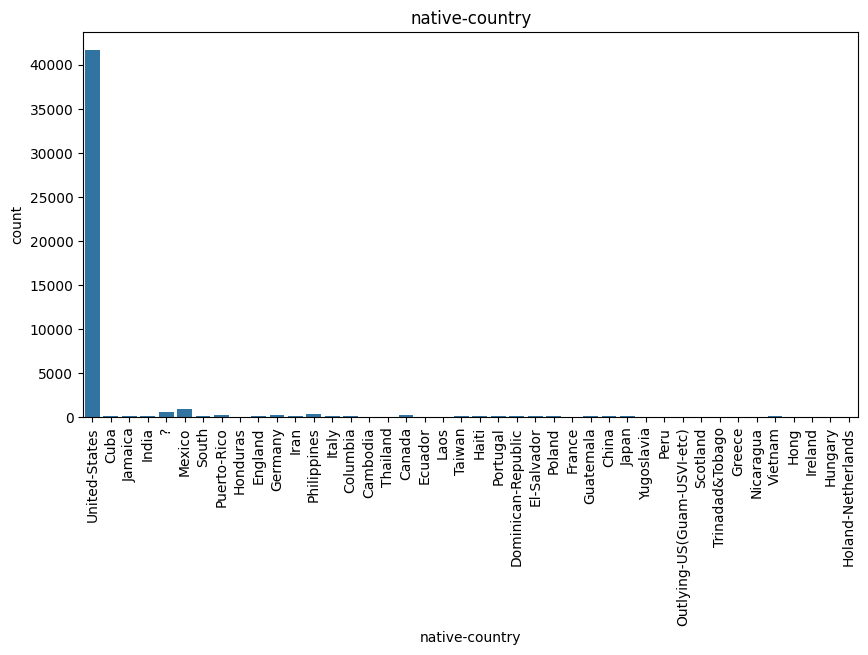

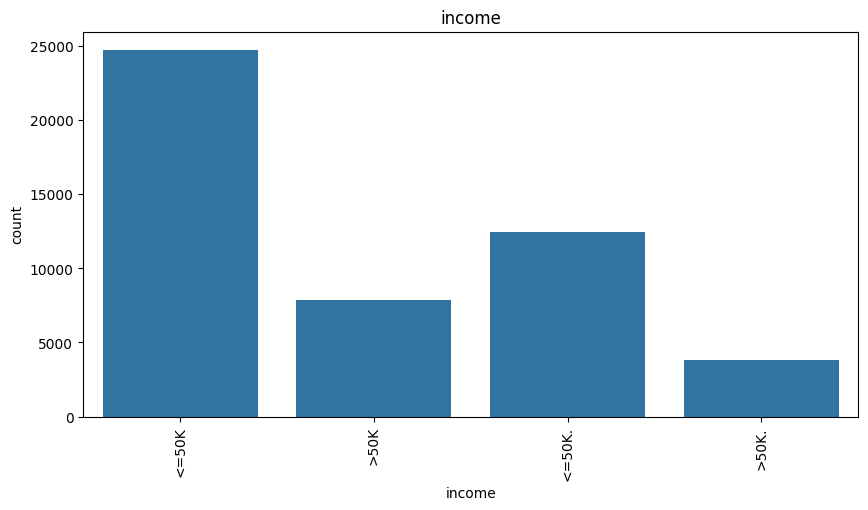

In [11]:
for i in cat_cols:
 plt.figure(figsize=(10,5))
 sns.countplot(data = data_adult,x=i)
 plt.xticks(rotation=90)
 plt.title(i)

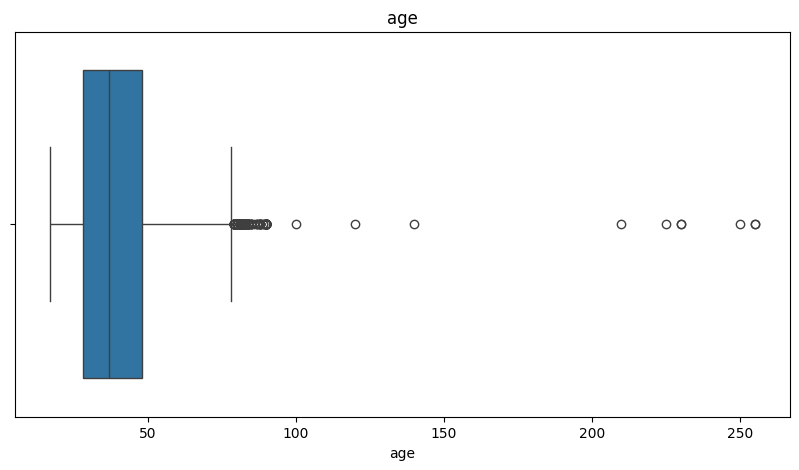

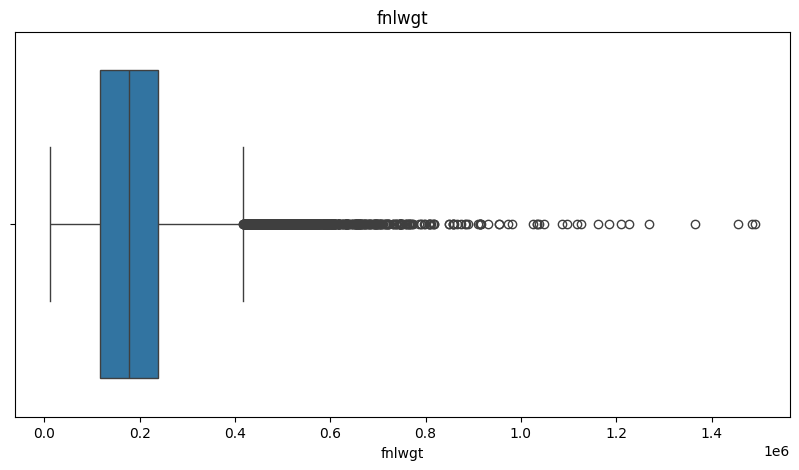

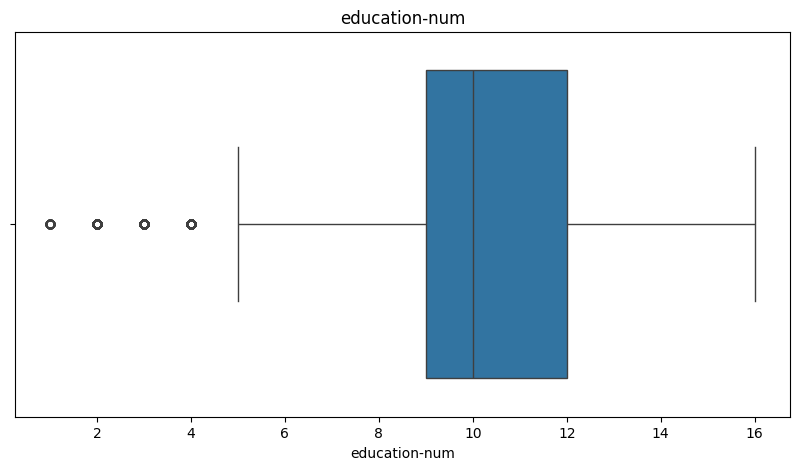

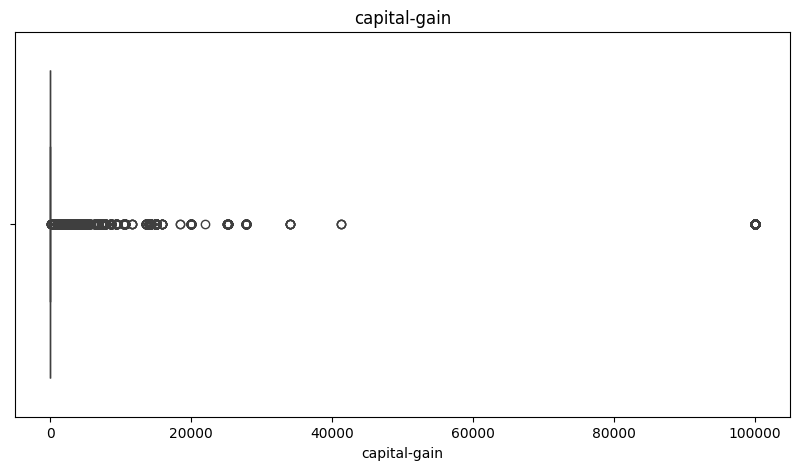

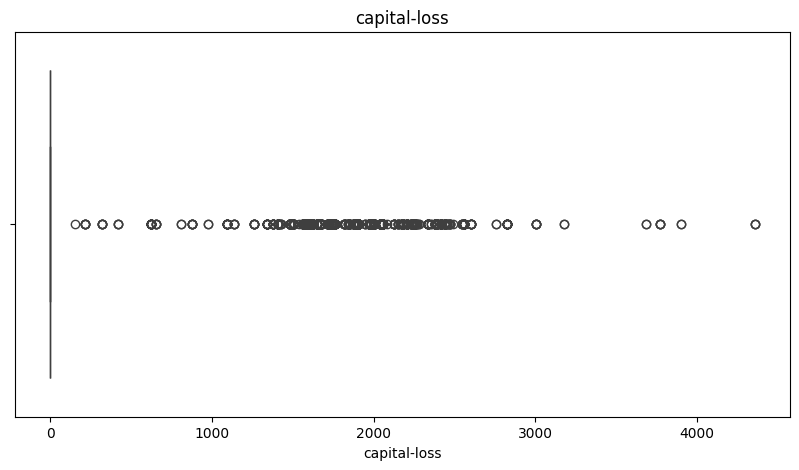

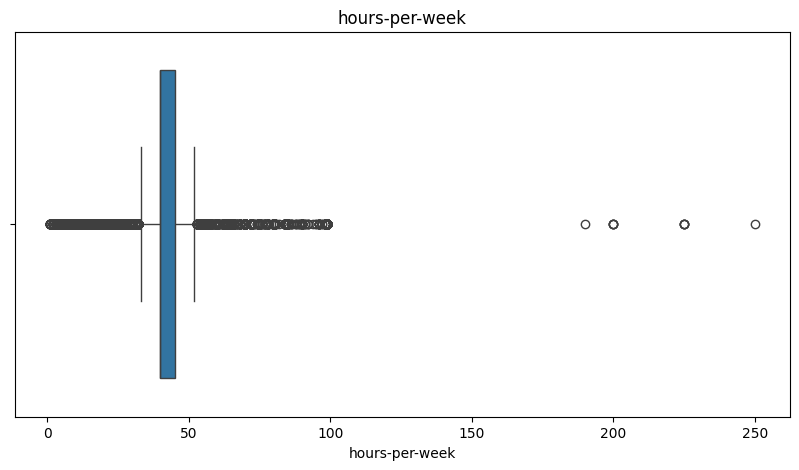

In [12]:
# identify the outlier

for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = data_adult,x=i)
  plt.title(i)

# Data preprocessing

In [13]:
data_adult = data_adult.drop(['fnlwgt','education','capital-gain','capital-loss','income'],axis=1)

In [14]:
data_adult.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,NaN
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba


In [15]:
data_adult['native-country'].unique()

array([nan, 'United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Columbia', 'Cambodia', 'Thailand',
       'Canada', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'Poland', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [16]:
data_adult['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', nan,
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
data_adult['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [18]:
data_adult['age'].unique()

array([ 39.,  50.,  38.,  53.,  28.,  37.,  49.,  52.,  31.,  42.,  30.,
        23.,  32.,  40.,  34.,  25.,  nan,  54.,  35.,  43.,  59.,  56.,
        19.,  20.,  45.,  22.,  48.,  21.,  24.,  57.,  44.,  41.,  29.,
        18.,  47.,  46.,  79.,  27.,  67.,  33.,  76.,  17., 120.,  36.,
        55.,  61.,  70.,  64.,  71.,  68.,  66.,  51.,  58.,  26.,  60.,
        90.,  75.,  65.,  77.,  62.,  63.,  80.,  74.,  72.,  69.,  73.,
        81.,  88., 250.,  78.,  82.,  83., 255.,  84.,  85., 225., 230.,
        86.,  87.,  89., 140., 100., 210.])

In [19]:
data_adult['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', '?', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [20]:
data_adult['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
data_adult['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [22]:
data_adult['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [23]:
data_adult['occupation'].value_counts()

,count
occupation,
Prof-specialty,5854
Craft-repair,5791
Exec-managerial,5771
Adm-clerical,5329
Sales,5231
Other-service,4657
Machine-op-inspct,2874
Transport-moving,2238
Handlers-cleaners,1977


In [24]:
data_adult['workclass'].value_counts()

,count
workclass,
Private,32220
Self-emp-not-inc,3649
Local-gov,2973
State-gov,1877
?,1763
Self-emp-inc,1625
Federal-gov,1346
Without-pay,18
Never-worked,9


In [25]:
data_adult.isna().sum()

,0
age,2442
workclass,3362
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0
hours-per-week,2442
native-country,2705


In [26]:
correlation_matrix= num_cols.corr()
correlation_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075863,0.030357,0.075581,0.057557,0.104259
fnlwgt,-0.075863,1.000000,-0.038761,-0.003706,-0.004366,-0.011411
education-num,0.030357,-0.038761,1.000000,0.125146,0.080972,0.139619
capital-gain,0.075581,-0.003706,0.125146,1.000000,-0.031441,0.081504
capital-loss,0.057557,-0.004366,0.080972,-0.031441,1.000000,0.052353
hours-per-week,0.104259,-0.011411,0.139619,0.081504,0.052353,1.000000


In [27]:
# Replace '?' with NaN in relevant categorical columns
categorical_cols_with_question_mark = ['workclass','occupation','native-country', 'marital-status', 'relationship', 'race', 'sex']
for col in categorical_cols_with_question_mark:
    if col in data_adult.columns:
        data_adult[col] = data_adult[col].replace('?', np.nan)

# Verify the replacement (optional)
# print(adult_data[categorical_cols_with_question_mark].isna().sum())

In [28]:
#data_adult.columns

handiling missing value

In [29]:
data_adult['age'] = data_adult['age'].fillna(data_adult['age'].median())
data_adult['hours-per-week'] = data_adult['hours-per-week'].fillna(data_adult['hours-per-week'].median())

In [30]:
data_adult['occupation'] = data_adult['occupation'].fillna(data_adult['occupation'].mode()[0])
data_adult['workclass'] = data_adult['workclass'].fillna(data_adult['workclass'].mode()[0])
data_adult['native-country'] = data_adult['native-country'].fillna(data_adult['native-country'].mode()[0])

In [31]:
data_adult.isna().sum()

,0
age,0
workclass,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
hours-per-week,0
native-country,0


In [32]:
# Handling outlier

data_adult['age'] = winsorize(data_adult['age'], limits=[0.00, 0.3487])
data_adult['hours-per-week'] = winsorize(data_adult['hours-per-week'], limits=[0.00, 0.40])

In [33]:
# encoding

cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Apply one-hot encoding
encoded_data = pd.get_dummies(data_adult, columns=cat_cols, drop_first=True, dtype='float64')
#display(encoded_data.head())

In [34]:

encoded_data.shape

(48842, 79)

In [35]:
# Scaling

num_cols = data_adult.select_dtypes(include=['int64','float64'])

print(num_cols.skew())

age              -0.689691
education-num    -0.316525
hours-per-week   -2.451439
dtype: float64


In [36]:
# dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=0.99) # Retain 95% of variance
x_pca = pca.fit_transform(encoded_data)


In [37]:
x_pca.shape

(48842, 9)

In [38]:
x_scaled = pd.DataFrame(x_pca)

In [39]:
# clustering

# k Mean clustering
from sklearn.cluster import KMeans


In [40]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[3754518.112746681,
 1927465.5249844044,
 1394813.3671065096,
 1128333.5077713619,
 991276.7751761337,
 866752.3118787792,
 777644.9510715177,
 742157.2651007766,
 642985.0210080135]

Text(0.5, 0, 'Number of clusters')

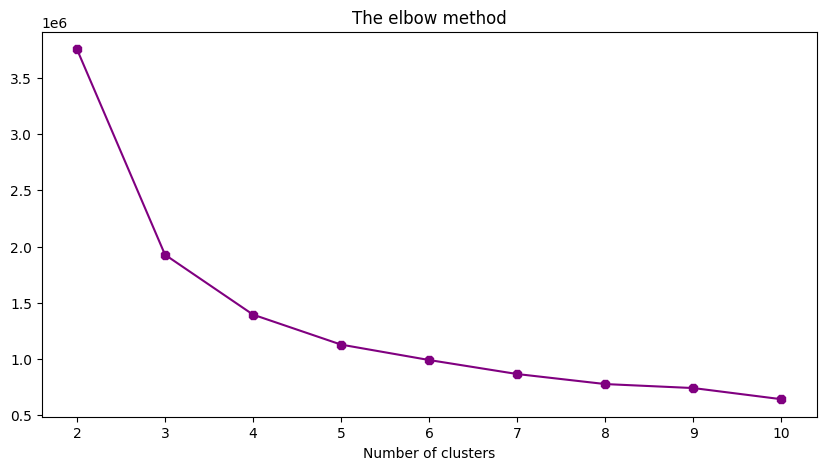

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11),wcss,color='purple',marker='8')
plt.title('The elbow method')
plt.xlabel('Number of clusters')

In [42]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4,random_state=42)
labels = kmeans.fit_predict(x_scaled)

score = silhouette_score(x_scaled,labels)
print('Silhouette Score:',score)

Silhouette Score: 0.5314305376671297


In [43]:
data_adult_copy = x_scaled.copy()

In [44]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(x_scaled)
data_adult_copy['Cluster'] = kmeans.predict(x_scaled)
data_adult_copy.head()

,0,1,2,3,4,5,6,7,8,Cluster
0,5.648765,-0.199634,2.699131,-0.792550,0.916366,-0.678365,-0.268488,-0.068718,0.123164,1
1,-8.951345,-23.092588,3.341514,0.923493,0.382030,-0.662176,-0.341317,-0.625030,-0.118976,2
2,4.717616,0.418426,-1.301715,-0.482006,0.688214,0.285219,-0.021215,0.027020,-0.272324,1
3,7.750031,-2.109247,-3.451949,0.272783,-0.524616,0.129631,-0.965334,0.507502,-0.260749,1
4,-2.843174,6.688255,3.053676,0.275558,-1.553718,0.103863,-0.048854,0.778951,-0.948912,0


In [45]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

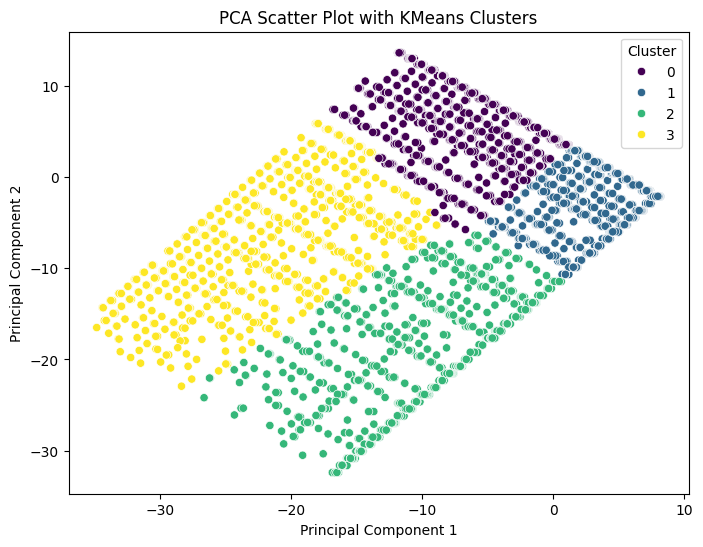

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=data_adult_copy['Cluster'], palette='viridis', legend='full')
plt.title('PCA Scatter Plot with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [47]:
kmeans.cluster_centers_

array([[-4.54891805e+00,  7.01465785e+00,  9.45074020e-02,
        -2.73269467e-03,  8.77218513e-03,  1.32609485e-03,
         1.54689113e-02,  6.96720018e-03, -7.17949362e-02],
       [ 5.99946459e+00, -1.37454171e+00, -5.77475495e-02,
        -1.64274871e-03, -5.51887301e-03, -2.02766179e-03,
        -6.81524427e-03, -1.40096385e-03,  3.42879119e-02],
       [-8.07904876e+00, -1.87409981e+01, -5.03505278e-02,
        -2.52940083e-02,  2.48680510e-02,  2.30919373e-02,
         4.62419824e-02,  1.14229832e-02, -1.13336214e-01],
       [-2.11809269e+01, -4.21545125e+00,  8.85787567e-02,
         4.55859436e-02, -1.47037839e-02, -8.59252254e-03,
        -5.09977656e-02, -2.84931353e-02,  1.32726752e-01]])

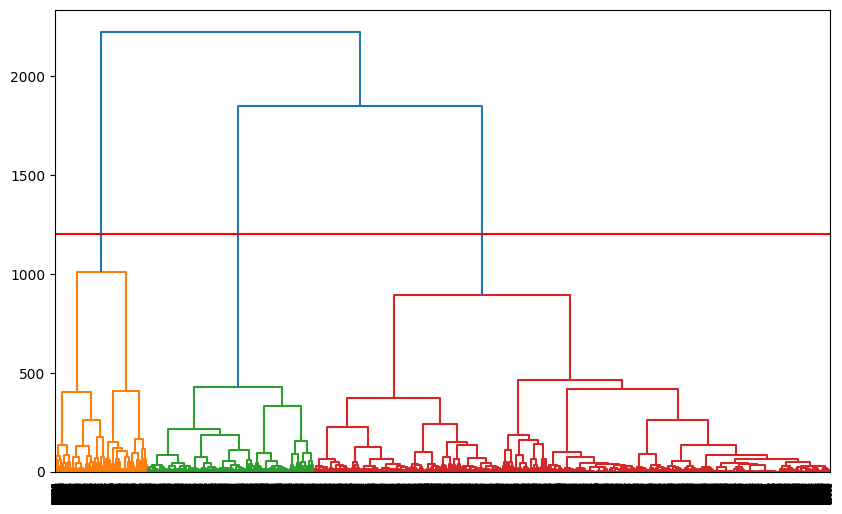

In [52]:
from scipy.cluster.hierarchy import dendrogram,linkage

mergings = linkage(x_scaled,method='ward')

plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(1200,color='red')
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(x_scaled)
new_cluster_labels


array([1, 0, 1, ..., 1, 1, 1])

In [50]:
data_adult_copy['agle_cluster'] = new_cluster_labels
data_adult_copy

,0,1,2,3,4,5,6,7,8,Cluster,agle_cluster
0,5.648765,-0.199634,2.699131,-0.792550,0.916366,-0.678365,-0.268488,-0.068718,0.123164,1,1
1,-8.951345,-23.092588,3.341514,0.923493,0.382030,-0.662176,-0.341317,-0.625030,-0.118976,2,0
2,4.717616,0.418426,-1.301715,-0.482006,0.688214,0.285219,-0.021215,0.027020,-0.272324,1,1
3,7.750031,-2.109247,-3.451949,0.272783,-0.524616,0.129631,-0.965334,0.507502,-0.260749,1,1
4,-2.843174,6.688255,3.053676,0.275558,-1.553718,0.103863,-0.048854,0.778951,-0.948912,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48837,3.142314,-3.328891,2.818800,-0.940371,0.031130,0.308378,0.705408,0.392447,-0.341791,1,1
48838,7.816490,-2.110920,-1.419129,-0.476301,-0.598805,0.037092,-0.579836,1.186851,-0.047762,1,1
48839,4.915379,0.401126,2.734550,0.573182,-0.083160,0.355339,0.354890,0.654026,0.058925,1,1
48840,7.972053,-2.092584,2.539217,-0.317328,-0.316003,0.286167,-0.978732,0.236682,0.677929,1,1


In [53]:
data_adult_copy['agle_cluster'].value_counts()


,count
agle_cluster,
1,32470
2,10526
0,5846


In [54]:
score = silhouette_score(x_scaled,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.49319581869105533


# interpretation and profiling

KMeans Clusters:

Cluster 0: This cluster seems to represent a group with a lower average age, slightly lower education level, and potentially different work/relationship statuses compared to Cluster 1.


Cluster 1: This cluster appears to be the largest and represents the most common demographic. It likely includes a broad range of ages and work attributes.


Cluster 2: This cluster has the lowest average age and hours per week. This might represent younger individuals, possibly students or those working part-time.

Cluster 3: This cluster shows the lowest average age and a very low number of hours per week. This could be a group of younger individuals who are not in the workforce or work very few hours.


Agglomerative Clusters:

Cluster 0: This cluster has the lowest average age and hours per week, similar to KMeans Cluster 2 and 3.

Cluster 1: This is the largest cluster and seems to be similar to KMeans Cluster 1, representing the most common demographic.

Cluster 2: This cluster has the highest average age and education level, suggesting it represents an older, more educated group.

***Upskill Programs:***

**KMeans Cluster 2 and 3 (and Agglomerative Cluster 0):** These clusters are characterized by lower age and lower hours worked per week. This suggests they might be students, individuals just entering the workforce, or those with limited work experience.

**KMeans Cluster 1 and Agglomerative Cluster 1:** While representing the general population, there might be individuals in these larger clusters who are looking to change careers or enhance their existing skills. Targeted upskill programs could cater to their specific needs.

**Tax Reforms:**

**KMeans Cluster 2 and 3 (and Agglomerative Cluster 0):** Individuals in these clusters might have lower incomes due to lower working hours or entry-level positions. Tax reforms that benefit lower-income individuals, such as tax credits or reduced tax rates, could be impactful.


**KMeans Cluster 0**: This cluster has a lower average age and education level compared to Cluster 1. Tax reforms that support further education or training could benefit this group.

**Financial Aid and Inclusion effort:**

**KMeans Cluster 2 and 3 (and Agglomerative Cluster 0):** Given their lower hours worked and potentially lower incomes, these groups are likely to benefit significantly from financial aid programs, such as grants, subsidies, or assistance with basic needs. Financial inclusion initiatives aimed at improving access to banking and financial services could also be valuable.


**Agglomerative Cluster 2:** While this cluster has a higher age and education level, there might still be individuals facing financial challenges. Financial aid and inclusion programs tailored to their specific needs, such as retirement planning assistance or support for healthcare costs, could be considered.